In [39]:
import numpy as np
import os, sys, time, subprocess, h5py, argparse, logging, pickle, random
from os.path import join as oj
import pandas as pd
import matplotlib
# matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import imageio
from cycler import cycler
cm = plt.get_cmap('BuGn')

# load in data from logs

In [78]:
# load in data from logs
def load_results(path_to_results):
    results = {}
    for dirname in os.listdir(path_to_results):
        if not '.png' in dirname and not 'Icon' in dirname:
            try:
                d = {}
                x = np.loadtxt(oj(path_to_results, dirname, 'log.txt'), skiprows=1)
                d['train'] = x[:, -2]
                d['val'] = x[:, -1]
                filter_name = [x for x in os.listdir(oj(path_to_results, dirname)) if 'filters' in x]
                if len(filter_name) == 1:
                    d['filters'] = imageio.imread(oj(path_to_results, dirname, filter_name[0]))
                results[dirname] = d
            except:
                pass
    return results

path_to_results = '/Users/chandan/drive/research/vision/scat/scat_results/cifar100/checkpoint'
out_dir = '/Users/chandan/drive/research/vision/scat/scat_results/figs'
results = load_results(path_to_results)
keys = sorted(list(results.keys()))

# decoding the key names
# extra - ran for full 200 epochs (everything should be extra eventually)
# lr - lowered learning rate by factor of 10
# sep - separated conv/scat through layer 2
# _n2 - missing the last to layers
print(keys)
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

['alexnet', 'alexnet_n2_extra', 'alexnet_n2_extra_lr', 'alexnet_n2_extra_lr_old', 'alexscat2_sep_extra', 'alexscat2_sep_schannel_extra', 'j2l2', 'j2l2_n2_extra', 'j2l2_n2_extra_lr', 'j2l3', 'j2l3_n2_extra', 'j2l3_n2_extra_lr', 'j2l4', 'j2l4_n2_extra', 'j2l4_n2_extra_lr']


# plot final train / val accs

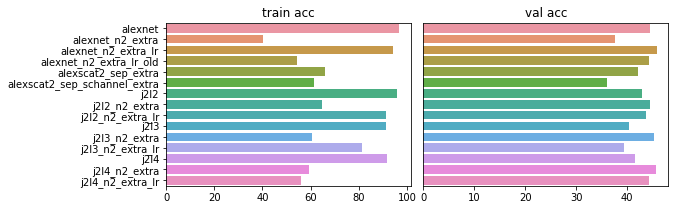

In [47]:
keys = sorted(list(results.keys()))
dicts = [results[key] for key in keys]

plt.figure(figsize=(9, 3), facecolor='white')

# plot train acc
plt.subplot(121)
sns.barplot([np.max(d['train']) for d in dicts], keys, orient='h')
plt.title('train acc')

# plot test acc
plt.subplot(122)
sns.barplot([np.max(d['val']) for d in dicts], keys, orient='h')
plt.gca().get_yaxis().set_visible(False)
plt.title('val acc')

# save and show
plt.subplots_adjust(wspace=0.05)
plt.savefig(oj(out_dir, 'cifar100_accs.pdf'))
plt.show()

# plot train / val curves

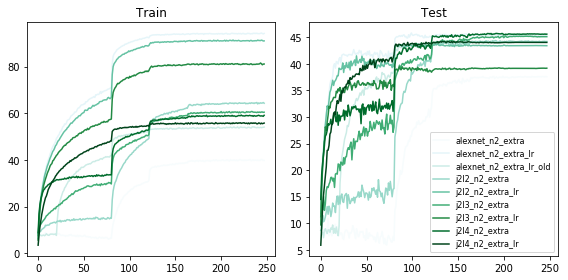

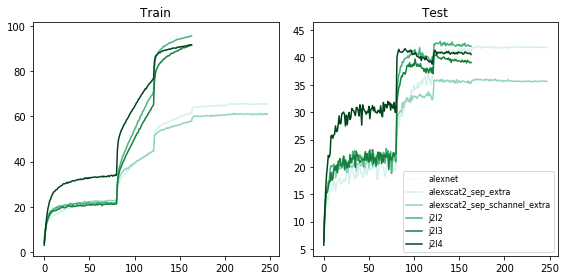

In [79]:
def plot_train_val_curves(keys, results):
    plt.figure(figsize=(8, 4), facecolor='white')
    
    # plot train
    ax = plt.subplot(121)
    ax.set_prop_cycle(cycler('color', [cm(k) for k in np.linspace(0, 1, len(keys))]))
    plt.title('Train')
    for key in keys:
        plt.plot(results[key]['train'], label=key)


    # plot val
    ax = plt.subplot(122)
    ax.set_prop_cycle(cycler('color', [cm(k) for k in np.linspace(0, 1, len(keys))]))
    plt.title('Test')
    for key in keys:
        plt.plot(results[key]['val'], label=key)
    plt.legend(ncol=1, loc='lower right', fontsize=8)
    
    plt.tight_layout()
    
    
# filter keys by n2
plot_train_val_curves([key for key in keys if 'n2' in key], results)
plt.savefig(oj(out_dir, 'accs_n2.pdf'), dpi=600)
plt.show()

# filter keys by not n2
plot_train_val_curves([key for key in keys if 'n2' not in key], results)
plt.savefig(oj(out_dir, 'accs_normal.pdf'), dpi=600)
plt.show()

# look at filters

In [ ]:
'''
# display filters
for i, key in enumerate(keys[:-1]):
    plt.subplot(3, 2, 3 + i)
    plt.title(key)
    plt.imshow(dicts[i]['filters'])
    plt.axis('off')
'''

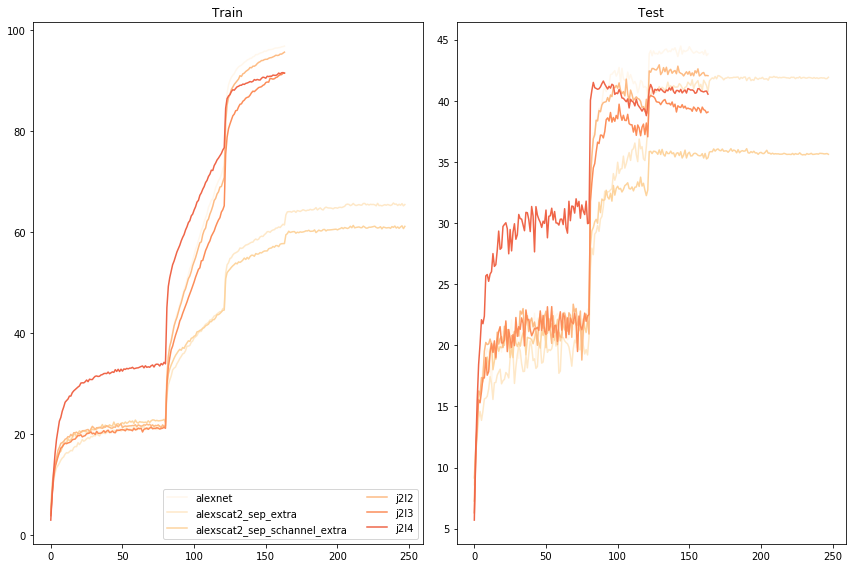

In [12]:
keys = sorted(list(results.keys()))
# filter out n2 / not n2
n2 = False
# if n2:
keys = [key for key in keys if 'n2' not in key]
# else:
#    keys = [key for key in keys if 'n2' not in key]
dicts = [results[key] for key in keys]

plt.figure(figsize=(12, 8), facecolor='white')


# cs_4 = ['#b2e2e2','#66c2a4','#2ca25f','#006d2c']
cs = ['#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000']

# plot train
plt.subplot(121)
plt.title('Train')
for i, key in enumerate(keys):
#     if i < 8:
    plt.plot(dicts[i]['train'], label=key, color=cs[i])
#     else:
#         plt.plot(dicts[i]['train'], '--', label=key, color=cs[i])
    
plt.legend(ncol=2, loc='lower right')

# plot test
plt.subplot(122)
plt.title('Test')
for i, key in enumerate(keys):
    plt.plot(dicts[i]['val'], label=key, color=cs[i])
# plt.legend()

plt.tight_layout()
# save and show
plt.savefig(oj(out_dir, 'accs_n2=' + str(n2) + '.pdf'), dpi=600)
plt.show()
